# Pandas Dataframes

## Agenda

1. About Dataframes   

2. Create Dataframes
    
3. View Dataframes

4. Compare Dataframes

5. Summarize Dataframes   

6. Attributes of Dataframes

7. Work with the Data in Dataframes
    
8. Circling back to 'About Dataframes': Series vs. Dataframes

## Lesson Goals

Upon completion of this lesson and exercises, you should be able to:

- Describe what a dataframe is and how it differs from a series. 

- Identify when you are using a pandas method or a pandas function. 

- Create a dataframe from a dictionary. 

- Create a dataframe from a list of lists or an n-dimensional array. 

- Identify an object type (`type`).

- 'Peek' at the contents of a dataframe (`print`, `df.head`, `df.tail`, `df.sample`)

- Compare 2 dataframes using numpy's `.all` method. 

- Summarize information contained in a dataframe (`df.info`, `df.describe`). 

- Access attributes (datatypes, number of rows & columns, row labels, column names) of a dataframe (`df.dtypes`, `df.shape`, `df.index`, `df.columns`)

- Subset a dataframe by selecting or dropping columns

- Understand the difference between the single and double bracket. 

- Subset a dataframe by filtering rows using a conditional. 

- Filter rows and subset columns in one step. 

- Rename columns

- Create a new column using an existing column. 

- Sort a dataframe by one or more columns. 

- Chain dataframe methods together, understand when it should work, & troubleshoot when it doesn't. 




## About Dataframes

- tabular  
- 2-dimensional   
- provide a number of facilities for manipulating and transforming the data   
- df allow us to put data into rows and columns

**Pandas Help: Functions & Methods**

You will use the pandas documentation often. pandas.pydata.org/pandas-docs/stable/reference

Documentation on Pandas Funtions can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html). 

Documentation on Pandas DataFrame Methods can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html). 

Documentation on Pandas Series Methods can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/series.html). 

You may be asking, "What's the difference between a method and a function?"
- function: carrying out a specific task.
- method: a function that belongs to an object

Boyini (2019) describes a **function** as "a block of code to carry out a specific task, will contain its own scope and is called by name. All functions may contain zero(no) arguments or more than one arguments. On exit, a function can or can not return one or more values." He then goes on to describe a method as "a function which belongs to an object." **Methods** are *called on* objects, so Pandas DataFrame Methods will be called on dataframe objects, and Pandas Series Methods will be called on series objects. That means that when calling a method, you precede it with the name of your dataframe or series, such as `my_df.info()` or `my_series.info()`. A Pandas Function will begin with `pd`, such as `pd.concat()`. 

(ex: .info() is a method that is going to be applied to my dataframe)

In [129]:
import pandas as pd

## Create Dataframes

1. We can pass a dictionary to create a dataframe, where the keys correspond to the names of the columns, and the values associated with those keys will make up the data.  

2. We can also pass lists or arrays to create a dataframe, where each list or array represents a row in the dataframe.   

3. We can copy an existing dataframe into a new dataframe

4. We can also create dataframes by reading data from an existing structured data set, such as a csv, a sql table, or an excel file. 

For this lesson, we will create a dataframe using the existing standings for NBA Western Conference using the first 3 methods above.


| Team| W  | L |
| ----| -- | --|
| LAC | 11 | 4 | 
| LAL | 11 | 4 | 
| UTA | 10 | 4 | 
| PHX |  8 | 5 | 
| GSW |  8 | 6 | 
| POR |  8 | 6 | 
| MEM |  7 | 6 | 
| SAS |  8 | 7 | 
| DAL |  7 | 7 | 
| DEN |  7 | 7 | 
| OKC |  6 | 7 | 
| NOR |  5 | 8 | 
| SAC |  5 | 10| 
| HOU |  4 | 9 | 
| MIN |  3 | 10| 

**Method 1**  

Pass a dictionary where keys => column names, values => column values. 

`df = pd.DataFrame({'col1_name': [values], 'col2_name': [values], 'col3_name': [values]})`

In [130]:
Team = ['LAC', 'LAL', 'UTA', 'PHX', 'GSW', 'POR', 'MEM', 'SAS', 'DAL', 'DEN', 'OKC', 'NOR', 'SAC', 'HOU', 'MIN']
W = [11, 11, 10, 8, 8, 8, 7, 8, 7, 7, 6, 5, 5,  4,  3]
L = [4,  4,   4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 10, 9, 10]

#needs to be an equal number of elements

In [131]:
pd.DataFrame({'Team': Team, 'W': W, "L": L})
#run it and output is generated
#assign it to a variable

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


In [132]:
df = pd.DataFrame({'Team': Team, 'W': W, "L": L})
df #run it to look at it 

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


In [133]:
print(df) #printing looks different

   Team   W   L
0   LAC  11   4
1   LAL  11   4
2   UTA  10   4
3   PHX   8   5
4   GSW   8   6
5   POR   8   6
6   MEM   7   6
7   SAS   8   7
8   DAL   7   7
9   DEN   7   7
10  OKC   6   7
11  NOR   5   8
12  SAC   5  10
13  HOU   4   9
14  MIN   3  10


**Method 2**. 

Pass a list of lists where each nested list is a row in the dataframe. 

`df = pd.DataFrame([row1, row2, row3, row4, ...], columns=[col1_name, col2_name, col3_name])`

In [134]:
# each list represents the team vector, or a row. 

lac = ['LAC', 11, 4]
lal = ['LAL', 11, 4]
uta = ['UTA', 10, 4]
phx = ['PHX', 8,  5] 
gsw = ['GSW', 8,  6] 
por = ['POR', 8,  6] 
mem = ['MEM', 7, 6]
sas = ['SAS', 8, 7]
dal = ['DAL', 7, 7]
den = ['DEN', 7, 7] 
okc = ['OKC', 6, 7]
nor = ['NOR', 5, 8]
sac = ['SAC', 5, 10]
hou = ['HOU', 4, 9]
minn = ['MIN', 3, 10]

#each team has a vector of information

In [135]:
df = pd.DataFrame([lac, lal, uta, phx, gsw, por, mem, sas, dal, den, okc, nor, sac, hou, minn], 
                  columns = ['Team', 'W', 'L'])

df

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


**Method 3**

Copy a dataframe from an existing dataframe. 

`new_df = existing_df.copy()`

In [136]:
my_new_df = df.copy()
my_new_df
#just assigning a new variable, but do .copy() on the original

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


In [137]:
#demo that it won't drop from the original df 
#if we have made a copy with .copy()
my_new_df.drop(columns=['Team'], inplace=True)
df

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


### Object Types

Guesses for the type of objects we just created?

`type(df)`

In [138]:
type(df)

pandas.core.frame.DataFrame

### Naming Conventions for Dataframes

It is common dataframes to contain `df` in their variable names, as we have here with `nba_df`. In many examples, you may see dataframes simply with the name `df`. In practice, especially if you are working with multiple dataframes, it is good to have a name that will describe what your dataframe contains or how it differs from the other dataframes in your environment, i.e. other dataframes you have created in your notebook or current python session or kernel. For example, when I created the first two dataframes, which are exactly the same, but my purpose is to demonstrate the different ways of creating them, I name them to identify that, albeit ridiculously long names ;). (We will compare them later to prove they are identical, btw). 

## View Dataframes

What's in these dataframes we just created? 

1. `nba_df` (without `print()`) gives a nice pretty display
2. `nba_df` (without `print()`) will not work outside of jupyter or ipython.   
3. `print(nba_df)` does not have an `Out[#]`, while `nba_df` does.    
4. `nba_df` (without `print()`) will not return anything if there is a statement following it in the same cell that displays something.  

In [139]:
df

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


In [140]:
print(df)

   Team   W   L
0   LAC  11   4
1   LAL  11   4
2   UTA  10   4
3   PHX   8   5
4   GSW   8   6
5   POR   8   6
6   MEM   7   6
7   SAS   8   7
8   DAL   7   7
9   DEN   7   7
10  OKC   6   7
11  NOR   5   8
12  SAC   5  10
13  HOU   4   9
14  MIN   3  10


We can also take a peek at the data in the dataframe by sampling: the first 5 rows, last 5 rows, a random sample, or anything in between. 

- `df.head()`: first n rows (default n = 5)  
- `df.tail()`: last n rows (default n = 5)  
- `df.sample(n, random_state=int)`: sample n rows
- `df.sample(frac, random_state=int)`: sample frac (proportion) of rows   

In [141]:
df.head()

,Team,W,L
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6


In [142]:
df.head(1)

,Team,W,L
0,LAC,11,4


In [143]:
df.tail(2)

,Team,W,L
13,HOU,4,9
14,MIN,3,10


In [144]:
df.sample(5)

,Team,W,L
12,SAC,5,10
9,DEN,7,7
4,GSW,8,6
7,SAS,8,7
11,NOR,5,8


In [145]:
df.sample(5) #run again, and gives you a diff sample

,Team,W,L
8,DAL,7,7
4,GSW,8,6
2,UTA,10,4
13,HOU,4,9
0,LAC,11,4


In [146]:
#what if we want the same sample?
df.sample(5, random_state=123)

,Team,W,L
7,SAS,8,7
10,OKC,6,7
4,GSW,8,6
0,LAC,11,4
5,POR,8,6


In [147]:
df.sample(5, random_state=123) # random_state= can be any # and any len

,Team,W,L
7,SAS,8,7
10,OKC,6,7
4,GSW,8,6
0,LAC,11,4
5,POR,8,6


In [148]:
df.sample(frac=.20, random_state=123)
         #specify fraction 20%

,Team,W,L
7,SAS,8,7
10,OKC,6,7
4,GSW,8,6


In [149]:
df.iloc[0]
#can also sample the dataframe
# iloc = index location

Team    LAC
W        11
L         4
Name: 0, dtype: object

In [150]:
df.iloc[5:10]
#sample by indicating which row/index values

,Team,W,L
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


## Compare Dataframes

Are nba_df_from_dict_as_cols and nba_df_from_lists_as_rows 
equivalent dataframes? Don't take my word for it. 

remember from numpy... `(my_array < 0).all()`?

`(df1 == df2).all()`

In [151]:
new_df = df.copy()

In [29]:
(new_df == df).all()
#comparing for each col if those values are exactly the same

Team    True
W       True
L       True
dtype: bool

In [152]:
(new_df.iloc[0] == df).all()

Team    False
W       False
L       False
dtype: bool

## Summarize Dataframes

- `df.info()`:  See total number of rows, column names, number of non-null values for each column, datatype of each column, size of the dataframe (memory usage) 

- `df.describe()`: Summary statistics of all the columns with numeric datatypes. 


In [153]:
# get the object type, index (row) range, column names, number of non-null values, datatypes, and size. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    15 non-null     object
 1   W       15 non-null     int64 
 2   L       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


In [155]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    15 non-null     object
 1   W       15 non-null     int64 
 2   L       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


NoneType

In [156]:
# get summary stats of the numeric columns
df.describe()

,W,L
count,15.000000,15.000000
mean,7.200000,6.666667
std,2.366432,1.988060
min,3.000000,4.000000
25%,5.500000,5.500000
50%,7.000000,7.000000
75%,8.000000,7.500000
max,11.000000,10.000000


In [158]:
summary_stats = df.describe()
summary_stats

,W,L
count,15.000000,15.000000
mean,7.200000,6.666667
std,2.366432,1.988060
min,3.000000,4.000000
25%,5.500000,5.500000
50%,7.000000,7.000000
75%,8.000000,7.500000
max,11.000000,10.000000


In [160]:
type(summary_stats)

pandas.core.frame.DataFrame

In [161]:
summary_stats.loc['std']
#.loc is selecting a row by the row name
#difference with .iloc = selects a row by the row index

W    2.366432
L    1.988060
Name: std, dtype: float64

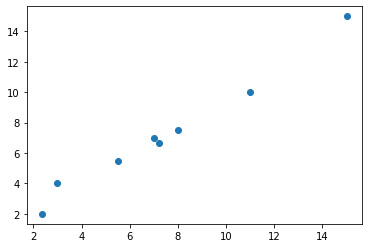

In [162]:
#you can plot this too
import matplotlib.pyplot as plt
plt.scatter(summary_stats.W, summary_stats.L)

## Dataframe Attributes

- `df.dtypes`: datatype of each column
- `df.shape`: tuple of number of rows & columns in the dataframe
- `df.index`: the labels for each row (usually autogenerated int)
- `df.columns`: you can also assign new values to this attribute. 

You will notice that when calling these attributes of dataframes, they are not followed by `()`. When you forget, you will just get a nice error to remind you :)

In [163]:
# get the datatypes of each column
df.dtypes

#the attributes aren't functions cause they don't have parenthesis after that

Team    object
W        int64
L        int64
dtype: object

In [164]:
# what type of object is returned when we call dtypes?
type(df.dtypes)

pandas.core.series.Series

In [165]:
# see rows and columns, or the shape, of the df
df.shape

(15, 3)

In [166]:
# what type of object does 'shape' return? 
type(df.shape)

tuple

In [167]:
# how can I get the number of rows? 
df.shape[0]
#first item of the tuple

15

In [168]:
#columns
df.shape[1]
#second item in the tuple

3

In [169]:
# what are the row labels, or index values, of of my dataframe? 
df.index

RangeIndex(start=0, stop=15, step=1)

In [170]:
# What type of object does .index return? 
type(df.index)

pandas.core.indexes.range.RangeIndex

In [171]:
# what are the column names of my dataframe? 
df.columns

Index(['Team', 'W', 'L'], dtype='object')

In [172]:
# what type of object is returned? 
type(df.columns)

pandas.core.indexes.base.Index

In [173]:
#dtypes returns a series
my_s = df.dtypes
#error cause Series doesn't have columns, Series is 1-Dimension

#my_s.columns
# asking for the columns of a series will return an error bc a series doesn't have columns. 


What do you notice? 

Column names are also an index, like rows. Axis 0 = Rows, Axis 1 = Columns

In [174]:
# rename the columns using the .columns attribute and the .upper and .lower methods. 
df.columns = ['team', 'wins', 'losses']
df.columns

Index(['team', 'wins', 'losses'], dtype='object')

In [175]:
df.columns = df.columns.str.upper()
df.columns

Index(['TEAM', 'WINS', 'LOSSES'], dtype='object')

In [176]:
df.columns = df.columns.str.lower()
df.columns

Index(['team', 'wins', 'losses'], dtype='object')

## Subset/Filter Dataframes

### Columns

Return a dataframe

- `df[[col1, col2]]`  
- `df[[col1]]`  
- `mycols = [col1, col2]` -> `df[mycols]`  

Return a series
- `df[col1]`  
- `df.col1`  


A dataframe will have a column index while series will not. A series will instead have a name for the series that was the original column name you selected. 

In [177]:
# return a series using single bracket

df['team']
#single bracket returns Series

0     LAC
1     LAL
2     UTA
3     PHX
4     GSW
5     POR
6     MEM
7     SAS
8     DAL
9     DEN
10    OKC
11    NOR
12    SAC
13    HOU
14    MIN
Name: team, dtype: object

In [178]:

type(df['team'])

pandas.core.series.Series

In [179]:
# if you try to put two column names in single bracket, you will get an error. 
# df['team', 'wins']

In [180]:
df['team', 'wins'] #error cause Series can't have more than 1 col

KeyError: ('team', 'wins')

In [181]:
# return a series using '.': df.colname

df.team


0     LAC
1     LAL
2     UTA
3     PHX
4     GSW
5     POR
6     MEM
7     SAS
8     DAL
9     DEN
10    OKC
11    NOR
12    SAC
13    HOU
14    MIN
Name: team, dtype: object

In [182]:
type(df.team) 


pandas.core.series.Series

In [183]:
# return a single column dataframe
df [['team']]


,team
0,LAC
1,LAL
2,UTA
3,PHX
4,GSW
5,POR
6,MEM
7,SAS
8,DAL
9,DEN


In [184]:
type(df [['team']])

pandas.core.frame.DataFrame

In [185]:
#return multiple columns:
df[['team', 'wins']].head()

,team,wins
0,LAC,11
1,LAL,11
2,UTA,10
3,PHX,8
4,GSW,8


In [186]:
#create a list of col to return and then select

my_cols = ['wins', 'losses']
df[my_cols].head()

,wins,losses
0,11,4
1,11,4
2,10,4
3,8,5
4,8,6


Helpful Notes:
- You’re passing a list of column names or labels to the indexing operator == double brackets.
- If you get an error message that refers to incorrect number of dementions check you brackets.

### Rows

We can subset a dataframe by filtering rows using a conditional. 

For example, `df[df.col1 < x]` will return all columns and all rows where col1 value is less than x. 

In [187]:
#get all rows where wins > 5
df[df.wins > 5]


,team,wins,losses
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
6,MEM,7,6
7,SAS,8,7
8,DAL,7,7
9,DEN,7,7


In [188]:
# get all rows where wins > 7
df[df.wins > 7]
# df[df['wins'] > 7]

,team,wins,losses
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
7,SAS,8,7


In [189]:
#which teams have more than 7 wins?
df[df.wins > 7][['team']]

,team
0,LAC
1,LAL
2,UTA
3,PHX
4,GSW
5,POR
7,SAS


In [190]:
# wins > 7 and losses < 6
df[(df.wins > 7) & (df.losses < 6)]

,team,wins,losses
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5


In [191]:
#wins > 7 OR losses < 4
df[(df.wins > 7) | (df.losses <4)]

,team,wins,losses
0,LAC,11,4
1,LAL,11,4
2,UTA,10,4
3,PHX,8,5
4,GSW,8,6
5,POR,8,6
7,SAS,8,7


### Subset Columns and Filter Rows

- `df[df.col1 < x].col2`: column 2 and rows where col1 value is less than x. What kind of object is returned?     
- `df[df.col1 < x][[col1, col2]]`: columns 1 & 2 and rows where col1 value is less than x. What kind of object is returned?   

In [192]:
#which teams have more than 7 wins
leading_wins_series = df[df.wins > 7].team
#or # leading_wins_series = df[df.wins > 7]['team']

leading_wins_series

0    LAC
1    LAL
2    UTA
3    PHX
4    GSW
5    POR
7    SAS
Name: team, dtype: object

In [193]:
type(leading_wins_series)

pandas.core.series.Series

In [194]:
leading_wins_df = df[df.wins > 7][['team']]
leading_wins_df

,team
0,LAC
1,LAL
2,UTA
3,PHX
4,GSW
5,POR
7,SAS


In [195]:
type(leading_wins_df)

pandas.core.frame.DataFrame

## Drop, Rename, Add Columns

**Drop**

`df.drop(colums=[])`

In the drop and rename methods (and many others in pandas), the original dataframe is not changed, but instead a new dataframe is produced. However, you can use the `inplace` argument to change the original dataframe. 


In [196]:
new_df = df.copy()

In [197]:
# drop columns 
#new_df = new_df.drop(columns=['losses'])

#using 'inplace'  #alters the current dataframe w/out having to rename or assign to another variable
new_df.drop(columns=['losses'], inplace=True)

In [200]:
new_df.columns

Index(['team', 'wins', 'losses'], dtype='object')

In [201]:
new_df = df.copy()

In [202]:
cols_to_rm = ['losses', 'wins']
new_df.drop(columns = cols_to_rm, inplace = True)

In [203]:
new_df = df.copy()

In [204]:
new_df.drop(cols_to_rm, axis = 1, inplace=True)

In [205]:
#Drop columns by not selecting avoids errors created 
#by rerunning the drop code after the column has been dropped.:
new_df = df.copy()
new_df[['team']]

,team
0,LAC
1,LAL
2,UTA
3,PHX
4,GSW
5,POR
6,MEM
7,SAS
8,DAL
9,DEN


**Rename**

`df.columns = [col1_new, col2_new, col3_new]`

In [206]:
# rename columns using .columns
df.columns = ['team', 'w', 'l']
df.columns

Index(['team', 'w', 'l'], dtype='object')

Benefit of the rename method is that you don't have to list all column names, only ones you are renaming. 

`df.rename(columns={'original_name': 'new_name'})`


In [207]:
# rename columns using .rename with dictionary
df.rename(columns={'w': 'wins', 'l': 'losses'}, inplace=True)
df.columns

Index(['team', 'wins', 'losses'], dtype='object')

`df['new_col'] = df['col1'] - df['col2']`

In [208]:
# create new columns: win_loss_delta

In [209]:
df['win_loss_delta'] = df['wins'] - df['losses']
df.head()

,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2


`df.assign(new_col = df['col1'] - df['col2'])`

In [211]:
#before doing below, drop column
df.drop(columns=['win_loss_delta'], inplace=True)

In [213]:
# create new column using assign
df = df.assign(win_loss_delta = df['wins'] - df['losses'])
#useful for chaining methods together
#useful to also assign multiple columns

df.head()

,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2


## Sort Dataframes

- `df.sort_values(by='col1', ascending=False)`: default is True, so `ascending` argument is not necessary if sorting in ascending order. 

In [214]:
# sort by win_loss_delta using sort_values
df.sort_values(by='win_loss_delta', ascending=False)
#don't have to put ascending, as defult = True

,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2
5,POR,8,6,2
6,MEM,7,6,1
7,SAS,8,7,1
8,DAL,7,7,0
9,DEN,7,7,0


In [215]:
#sort by multiple cols
df.sort_values(by=['wins', 'losses'], ascending=[False, True])
#first sorting by wins, descending; then sorts by losses, ascending

,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2
5,POR,8,6,2
7,SAS,8,7,1
6,MEM,7,6,1
8,DAL,7,7,0
9,DEN,7,7,0


In [216]:
#the order the columns are listed in the 'by' argument, 
#is the order they are sorted.
#losses sorted first, ascending, then wins descending
df.sort_values(by=['losses', 'wins'], ascending=[True, False])


,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2
5,POR,8,6,2
6,MEM,7,6,1
7,SAS,8,7,1
8,DAL,7,7,0
9,DEN,7,7,0


In [217]:
# save sorted dataframe and select top/bottom
df.sort_values(by=['wins', 'losses'], ascending=[True, False]).head(5)


,team,wins,losses,win_loss_delta
14,MIN,3,10,-7
13,HOU,4,9,-5
12,SAC,5,10,-5
11,NOR,5,8,-3
10,OKC,6,7,-1


In [218]:
#sort by ascending losses only
df.sort_values(by='losses', ascending=True).head(5)

,team,wins,losses,win_loss_delta
0,LAC,11,4,7
1,LAL,11,4,7
2,UTA,10,4,6
3,PHX,8,5,3
4,GSW,8,6,2


## Chain Dataframe Methods

As long as each method is returning a dataframe, these can be chained together to quickly and easily create the dataframe you need. 

Challenge: find the teams that would be in playoffs today if it started right now. Find the top 8 teams by win_pct. 

1. using sort_values(): assign -> sort -> head

2. using nlargest(n, 'col_name', keep='all'): assign -> nlargest

3. by adding new column of rank using the sorted dataframe: assign -> sort -> reset_index -> assign(rank) -> head()

In [219]:
#at each step confirm you are returning what you expect
df.assign(win_pct = df.wins/(df.wins + df.losses)).sort_values(by='win_pct', ascending=False).head(8)

,team,wins,losses,win_loss_delta,win_pct
0,LAC,11,4,7,0.733333
1,LAL,11,4,7,0.733333
2,UTA,10,4,6,0.714286
3,PHX,8,5,3,0.615385
4,GSW,8,6,2,0.571429
5,POR,8,6,2,0.571429
6,MEM,7,6,1,0.538462
7,SAS,8,7,1,0.533333


In [220]:
#you can separate the lines to make easier to read:
(df.assign(win_pct = df.wins/(df.wins + df.losses))
 .sort_values(by='win_pct', ascending=False)
 .head(8)
)

,team,wins,losses,win_loss_delta,win_pct
0,LAC,11,4,7,0.733333
1,LAL,11,4,7,0.733333
2,UTA,10,4,6,0.714286
3,PHX,8,5,3,0.615385
4,GSW,8,6,2,0.571429
5,POR,8,6,2,0.571429
6,MEM,7,6,1,0.538462
7,SAS,8,7,1,0.533333


In [221]:
#get same results without sorting:
(df.assign(win_pct = df.wins / (df.wins + df.losses))
    .nlargest(8, 'win_pct', keep='all')
)

,team,wins,losses,win_loss_delta,win_pct
0,LAC,11,4,7,0.733333
1,LAL,11,4,7,0.733333
2,UTA,10,4,6,0.714286
3,PHX,8,5,3,0.615385
4,GSW,8,6,2,0.571429
5,POR,8,6,2,0.571429
6,MEM,7,6,1,0.538462
7,SAS,8,7,1,0.533333


In [222]:
#find the lowest win_pct
(df.assign(win_pct = df.wins/(df.wins + df.losses))
    .sort_values(by='win_pct', ascending = True)
    .reset_index() #moves original index into the columns 
)

,index,team,wins,losses,win_loss_delta,win_pct
0,14,MIN,3,10,-7,0.230769
1,13,HOU,4,9,-5,0.307692
2,12,SAC,5,10,-5,0.333333
3,11,NOR,5,8,-3,0.384615
4,10,OKC,6,7,-1,0.461538
5,8,DAL,7,7,0,0.500000
6,9,DEN,7,7,0,0.500000
7,7,SAS,8,7,1,0.533333
8,6,MEM,7,6,1,0.538462
9,4,GSW,8,6,2,0.571429


In [223]:
#find the lowest win_pct
(df.assign(win_pct = df.wins/(df.wins + df.losses))
    .sort_values(by='win_pct', ascending = True)
    .reset_index(drop=True) #you can drop the original index col 
)

,team,wins,losses,win_loss_delta,win_pct
0,MIN,3,10,-7,0.230769
1,HOU,4,9,-5,0.307692
2,SAC,5,10,-5,0.333333
3,NOR,5,8,-3,0.384615
4,OKC,6,7,-1,0.461538
5,DAL,7,7,0,0.500000
6,DEN,7,7,0,0.500000
7,SAS,8,7,1,0.533333
8,MEM,7,6,1,0.538462
9,GSW,8,6,2,0.571429


In [224]:
#reset the index again and get the rank
(df.assign(win_pct = df.wins/(df.wins + df.losses))
    .sort_values(by='win_pct', ascending = False)
    .reset_index(drop=False)
    .assign(rank=df.index+1) #+1 to start the rank at 1 instead of 0
    .drop(columns=['index'])
    .nsmallest(8, 'rank')
)

,team,wins,losses,win_loss_delta,win_pct,rank
0,LAC,11,4,7,0.733333,1
1,LAL,11,4,7,0.733333,2
2,UTA,10,4,6,0.714286,3
3,PHX,8,5,3,0.615385,4
4,GSW,8,6,2,0.571429,5
5,POR,8,6,2,0.571429,6
6,MEM,7,6,1,0.538462,7
7,SAS,8,7,1,0.533333,8


## Series vs. Dataframe

In [115]:
s_values = ['LAL', 'LAC', 'DEN', 'OKC']
s_name = 'team'
s_index = [0, 1, 2, 3]
s_dtype = 'str'

s_teams = pd.Series(data=s_values, 
                    index=s_index,  
                    dtype=s_dtype, 
                    name=s_name)

In [116]:
print("name: ", s_teams.name,  "\ncolumns: NA\nindex: ", s_teams.index, "\naxes: ", s_teams.axes, "\ndtypes: ", s_teams.dtypes, 
      "\nndim: ", s_teams.ndim, "\nsize: ", s_teams.size, "\nshape: ", s_teams.shape, "\nvalues: ", s_teams.values)

name:  team 
columns: NA
index:  Int64Index([0, 1, 2, 3], dtype='int64') 
axes:  [Int64Index([0, 1, 2, 3], dtype='int64')] 
dtypes:  object 
ndim:  1 
size:  4 
shape:  (4,) 
values:  ['LAL' 'LAC' 'DEN' 'OKC']


In [117]:
s_values = [52, 48, 46, 44]
s_name = 'wins'
s_index = [0, 1, 2, 3]
s_dtype = 'int'

s_wins = pd.Series(data=s_values, 
                    index=s_index,  
                    dtype=s_dtype, 
                    name=s_name)

In [118]:
print("name: ", s_wins.name,  "\ncolumns: NA\nindex: ", s_wins.index, "\naxes: ", s_wins.axes, "\ndtypes: ", s_wins.dtypes, 
      "\nndim: ", s_wins.ndim, "\nsize: ", s_wins.size, "\nshape: ", s_wins.shape, "\nvalues: ", s_wins.values)

name:  wins 
columns: NA
index:  Int64Index([0, 1, 2, 3], dtype='int64') 
axes:  [Int64Index([0, 1, 2, 3], dtype='int64')] 
dtypes:  int64 
ndim:  1 
size:  4 
shape:  (4,) 
values:  [52 48 46 44]


In [65]:
df = pd.DataFrame({'team': s_teams, 'wins': s_wins})

print("name: NA\ncolumns: ", df.columns, "\nindex: ", df.index, "\naxes: ", df.axes, 
      "\ndtypes: ", df.dtypes, "\nndim: ", df.ndim, "\nsize: ", df.size, 
      "\nshape: ", df.shape, "\nvalues: ", df.values)
# data=None, index=None, columns=None, dtype=None, copy=Fals

name: NA
columns:  Index(['team', 'wins'], dtype='object') 
index:  Int64Index([0, 1, 2, 3], dtype='int64') 
axes:  [Int64Index([0, 1, 2, 3], dtype='int64'), Index(['team', 'wins'], dtype='object')] 
dtypes:  team    object
wins     int64
dtype: object 
ndim:  2 
size:  8 
shape:  (4, 2) 
values:  [['LAL' 52]
 ['LAC' 48]
 ['DEN' 46]
 ['OKC' 44]]


In [120]:
df['team']
#single brackets = Series
#SS
#single Series

0     LAC
1     LAL
2     UTA
3     PHX
4     GSW
5     POR
6     MEM
7     SAS
8     DAL
9     DEN
10    OKC
11    NOR
12    SAC
13    HOU
14    MIN
Name: team, dtype: object

In [121]:
df[['team']]
#double brackets=Dataframe
#DD
#double dataframes

,team
0,LAC
1,LAL
2,UTA
3,PHX
4,GSW
5,POR
6,MEM
7,SAS
8,DAL
9,DEN


**References**

Boyini, K. (2019, February 19). Difference between Method and Function in Python. Retrieved January 20, 2021, from https://www.tutorialspoint.com/difference-between-method-and-function-in-python#:~:text=Unlike a function, methods are,access that data within it.

**Time needed to deliver lesson:**

